# Kwantyle

Dla każdej dystrybuanty $F$, a więc też dla każdej zmiennej losowej, określa się tak zwany kwantyl rzędu $p$, gdzie $0 < p < 1$. Jest to liczba:

$$
q_p = \min \{ x : F(x) \ge p \}.
$$

W przypadku gdy dystrybuanta jest funkcją odwracalną, określenie kwantyla znacznie się upraszcza:

$$
q_p = F^{-1}(p).
$$


Wówczas kwantyl ma prostą interpretację w języku zmiennych losowych. Mianowicie:

$$
P(X < q_p) = P(X \le q_p) = F(q_p) = p,
$$

$$
P(X > q_p) = 1 - P(X \le q_p) = 1 - F(q_p) = 1- p.
$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Będziemy liczyć kwantyl rzędu $p=0.5$

In [3]:
p=0.75

Zdefiniujmy zmienną losową o rozkładzie Normalnym

In [4]:
(mu, sigma)=(0,1)
nd=stats.norm(mu, sigma)

# Percentile Point Function (PPF): the inverse of the CDF: 
Jak widzimy czasami w obliczeniach przydaje się funkcja odwrotna do dystrybuanty $CDF^{-1}(x)$, którą nazywa się Percentile Point Function (PPF): 

$$
PPF(x)=CDF^{-1}(x)
$$

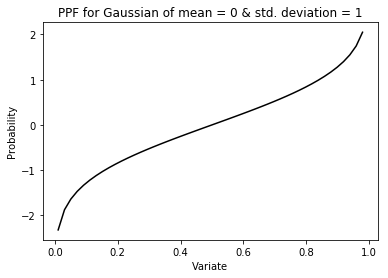

In [5]:
# 50 numbers between -3σ and 3σ
x = np.linspace(-1, 1, 100)
# PPF at these values
y = stats.norm.ppf(x, loc=mu, scale=sigma)

plt.plot(x,y, color="black")
plt.xlabel("Variate")
plt.ylabel("Probability")
plt.title("PPF for Gaussian of mean = {0} & std. deviation = {1}".format(mu, sigma))
plt.show()

In [6]:
stats.norm.ppf(p)

0.67448975019608171

$$
P(X < q_p) = P(X \le q_p) = F(q_p) = p,
$$

In [7]:
print(stats.norm.cdf(stats.norm.ppf(p)))
print(p)

0.75
0.75



$$
P(X > q_p) = 1 - P(X \le q_p) = 1 - F(q_p) = 1- p.
$$

In [8]:
print(stats.norm.sf(stats.norm.ppf(p)))
print(1-stats.norm.cdf(stats.norm.ppf(p)))
print(p)

0.25
0.25
0.75


# Zadanie 1
Narysuj na oddzielnych wykresach: 
<ul>
<li> gęstość rozkładu normalnego </li>
<li> dystrybuantę rozkładu normalnego </li>
<li> funkcję odwrotną do dystrybuanty </li>
</ul>

i zaznacz na nich odpowiednie wartości tak by móc odtworzyć poniższy rysunek.

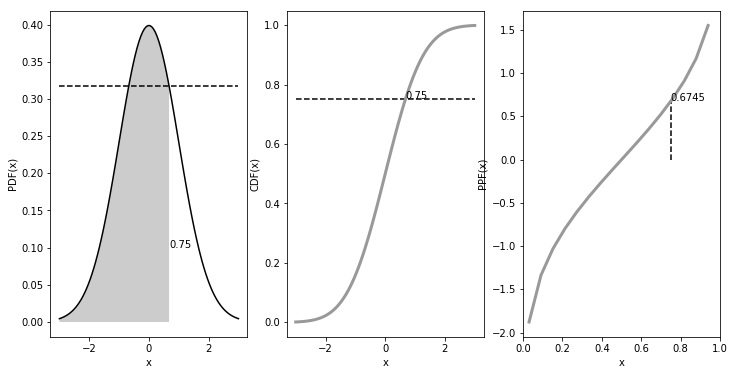

In [16]:
x0=stats.norm.ppf(p)
(inte,err)=integrate.quad(lambda x: nd.pdf(x), -np.inf, x0)

x = np.linspace(-3,3,100)
yp = nd.pdf(x)
y = nd.cdf(x)
yppf = nd.ppf(x)
x1 = np.linspace(-3, x0)
y1 = nd.pdf(x1)

figs, axs = plt.subplots(1,3, figsize=(12, 6))
axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].text(x0, 0.1, np.round(inte,4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')
axs[0].hlines(nd.pdf(x0), -3, 3, linestyles='--')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(x0, nd.cdf(x0), np.round(nd.cdf(x0),4))
axs[1].hlines(p, -3, 3, linestyles='--')

axs[2].plot(x, yppf, '#999999', lw=3)
axs[2].set_xlabel('x')
axs[2].set_ylabel('PPF(x)')
axs[2].set_xlim([0,1])
axs[2].text(p, nd.ppf(p), np.round(nd.ppf(p),4))
axs[2].vlines(p, 0, nd.ppf(p), linestyles='--')
plt.show()